Grafico allnet

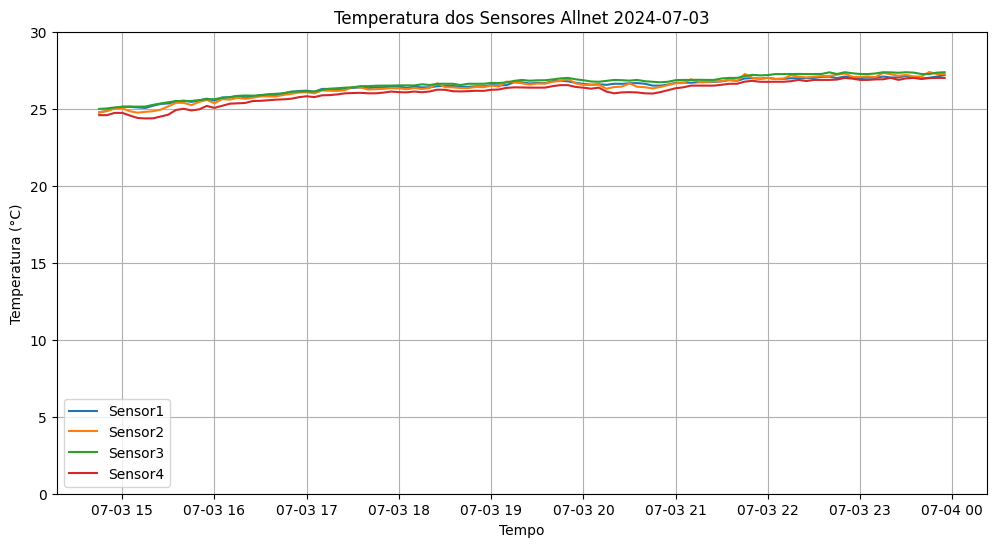

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('2024_07.csv',sep=';',decimal=',')

# Criar uma coluna datetime a partir das colunas DATE e TIME
df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

# Definir a coluna datetime como o índice
df.set_index('datetime', inplace=True)

# Remover colunas desnecessárias
df = df[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']]

# Filtrar dados para uma data específica
data_especifica = '2024-07-03'
df_filtered = df.loc[data_especifica]

# Reamostrar os dados para um intervalo de 5 minutos
df_resampled = df_filtered.resample('5T').mean()

# Plotar os dados
plt.figure(figsize=(12, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)
    
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura dos Sensores Allnet 2024-07-03')
plt.ylim(0, 30)
#plt.ylim(0, 1)  # Atualizar o limite do eixo y com base na normalização (0 a 1)
plt.legend()
plt.grid(True)
plt.show()

Grafico esp8266


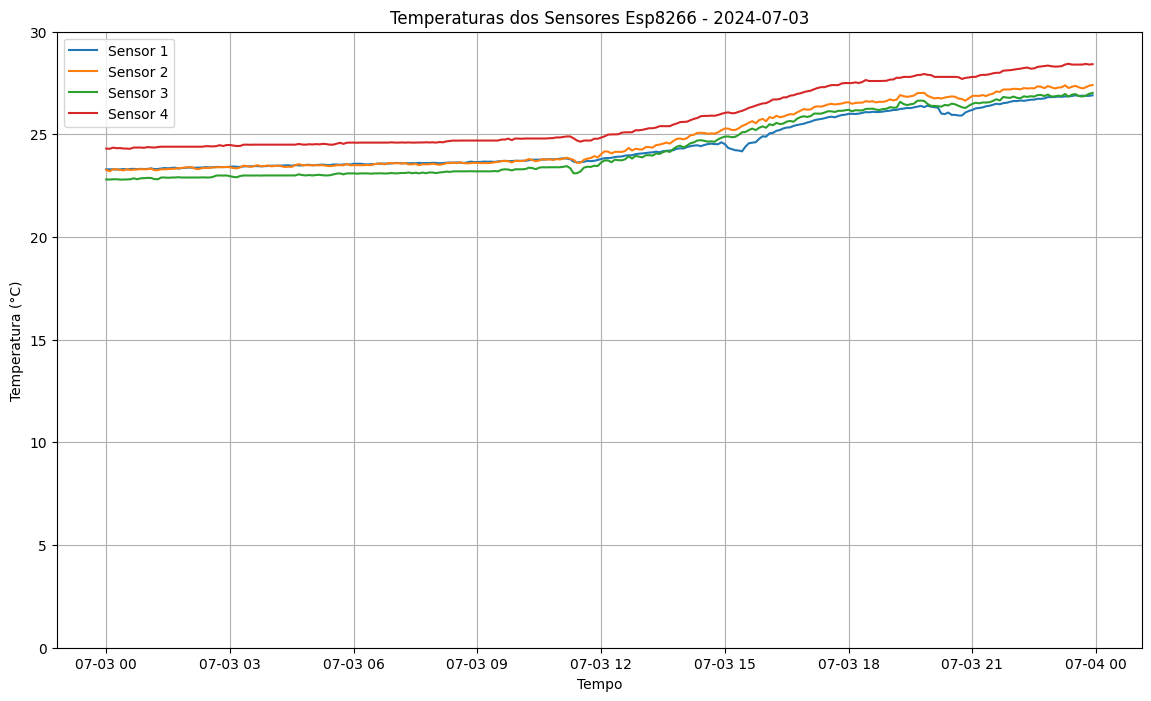

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
arquivo_csv = 'temperatura.csv'

# Leitura do arquivo CSV para um DataFrame do pandas
df = pd.read_csv(arquivo_csv)

# Removendo a unidade "°C" e convertendo as colunas de temperatura para float
sensor_columns = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']
for column in sensor_columns:
    df[column] = df[column].str.replace(' °C', '').astype(float)

# Convertendo a coluna 'Time' para datetime
df['Time'] = pd.to_datetime(df['Time'])

# Definindo 'Time' como o índice do DataFrame
df.set_index('Time', inplace=True)

# Filtrando os dados para um único dia (3 de julho de 2024)
data_especifica = '2024-07-03'
df = df.loc[data_especifica]

# Reamostrando os dados para um intervalo de 5 minutos
df_resampled = df.resample('5T').mean()

# Filtrando os valores para o intervalo de temperatura de 0 a 30 °C
for column in sensor_columns:
    df_resampled[column] = df_resampled[column].clip(lower=0, upper=30)

# Criando o gráfico de linhas
plt.figure(figsize=(14, 8))
for column in sensor_columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)

# Configurações adicionais do gráfico
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.title(f'Temperaturas dos Sensores Esp8266 - {data_especifica}')
plt.ylim(0, 30)
plt.legend()
plt.grid(True)

# Exibição do gráfico
plt.show()